
**IMPORTING LIBRARIES:**

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**LOADING DATA FILES:**

In [2]:
#Loading csv file using pandas
df = pd.read_csv("/content/Credit_Score.csv")

In [3]:
#Display the first rows of the DataFrame
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


**DATA DEFINING:**

This data includes the following information:

Age: The age of the person in years.

Gender: The gender of the person (male or female).

Income: The annual income of the person.

Education: The highest level of education completed by the person.

Marital Status: The marital status of the person (single, married).

Number of Children: The number of children the person has.

Home Ownership: Whether the person owns their home or rents it.

Credit Score: The credit score of the person, which is a measure of their creditworthiness.

In [4]:
#statistical information
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


**DATA CLEANING:**

Exploring the unique values in the categorical features to get a clear idea of the data.

[Gender] [Education] [Marital Status] [Home Ownership] [Credit Score]

In [5]:
# Print the count of unique values in the "Gender" column
print("Gender:\n", df["Gender"].value_counts(), "\n")

# Print the count of unique values in the "Education" column
print("Education:\n", df["Education"].value_counts(), "\n")

# Print the count of unique values in the "Marital Status" column
print("Marital_Status:\n", df["Marital Status"].value_counts(), "\n")

# Print the count of unique values in the "Home Ownership" column
print("Home Ownership:\n", df["Home Ownership"].value_counts(), "\n")

# Print the count of unique values in the "Credit Score" column
print("Credit Score:\n", df["Credit Score"].value_counts(), "\n")


Gender:
 Female    86
Male      78
Name: Gender, dtype: int64 

Education:
 Bachelor's Degree      42
Master's Degree        36
Doctorate              31
High School Diploma    30
Associate's Degree     25
Name: Education, dtype: int64 

Marital_Status:
 Married    87
Single     77
Name: Marital Status, dtype: int64 

Home Ownership:
 Owned     111
Rented     53
Name: Home Ownership, dtype: int64 

Credit Score:
 High       113
Average     36
Low         15
Name: Credit Score, dtype: int64 



**DATA VISUALIZATIONS:**

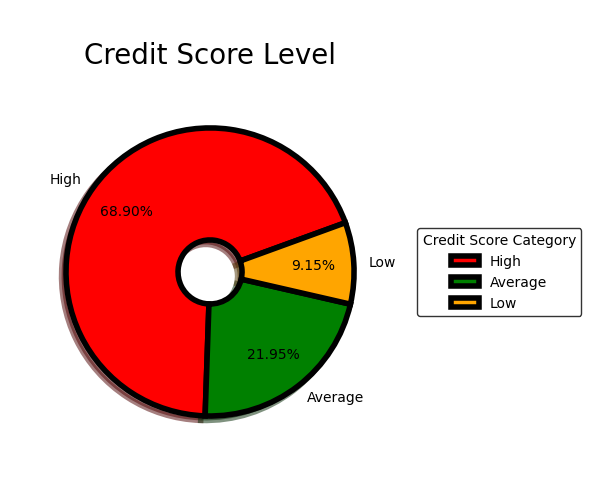

In [6]:
# Specify credit score labels
labels = ["High", "Average", "Low"]
# Count the occurrences of each credit score category
sizes = df["Credit Score"].value_counts()
# Create a figure and axis with specified size
fig, ax = plt.subplots(figsize=(6, 6))
# Specify colors for each credit score category
colors = ["red", "green", "orange"]
# Set explode to (0, 0, 0) to have no wedge exploded
explode = (0, 0, 0)
# Create a pie chart with specified parameters
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, autopct="%.2f%%",
                                  pctdistance=0.72, radius=0.9, colors=colors, shadow=True,
                                  wedgeprops=dict(width=0.7, edgecolor="black", linewidth=4),
                                  startangle=20)
# Add legend with specified parameters
ax.legend(wedges, labels, title="Credit Score Category", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1),
          edgecolor="black")
# Set title for the pie chart
ax.set_title("\nCredit Score Level", fontsize=20)
# Adjust layout for a tight display
fig.tight_layout()
# Display the pie chart
plt.show()

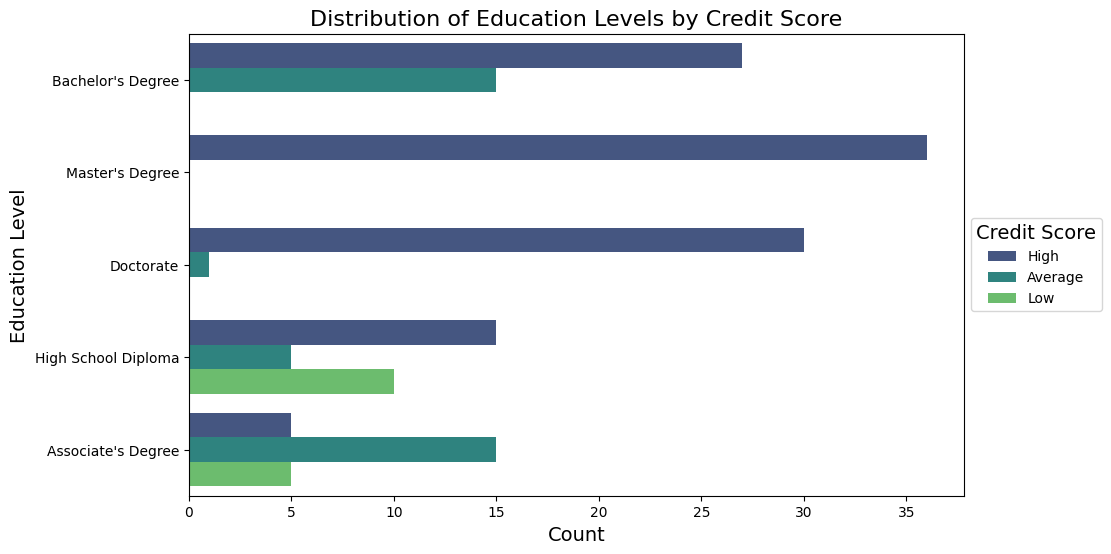

In [ ]:
# Compare 'Education' With 'Target' columns in dataset
# Set the size for the plot
plt.figure(figsize=(10, 6))
# Create a bar plot for the 'Education' variable, color-coded by 'Credit Score'
sns.countplot(y='Education', hue='Credit Score', data=df, palette='viridis')
plt.title("Distribution of Education Levels by Credit Score", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Education Level", fontsize=14)
plt.legend(title="Credit Score", title_fontsize='14', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

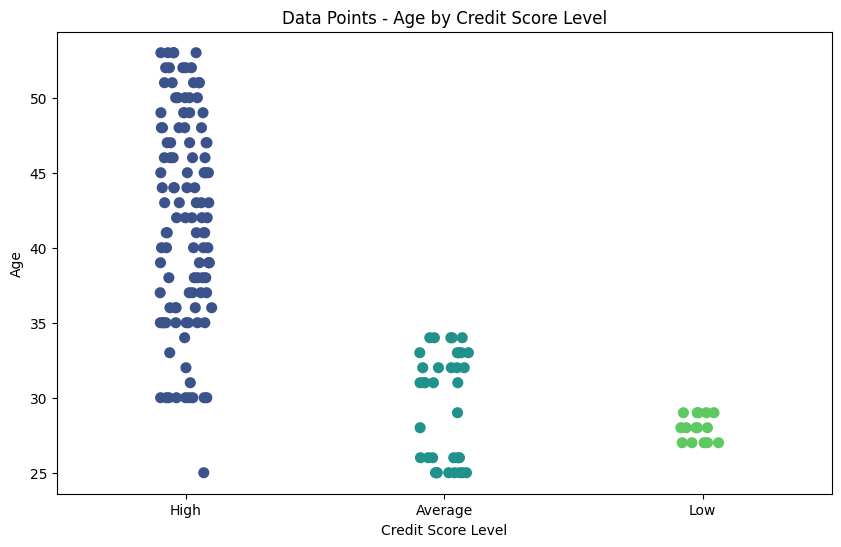

In [ ]:
# Compare 'Age' With 'Target' columns in dataset
# Create a strip plot to compare average age for different credit score levels
plt.figure(figsize=(10, 6))
sns.stripplot(x='Credit Score', y='Age', data=df, palette='viridis', jitter=True, size=8)
plt.title('Data Points - Age by Credit Score Level')
plt.xlabel('Credit Score Level')
plt.ylabel('Age')
plt.show()

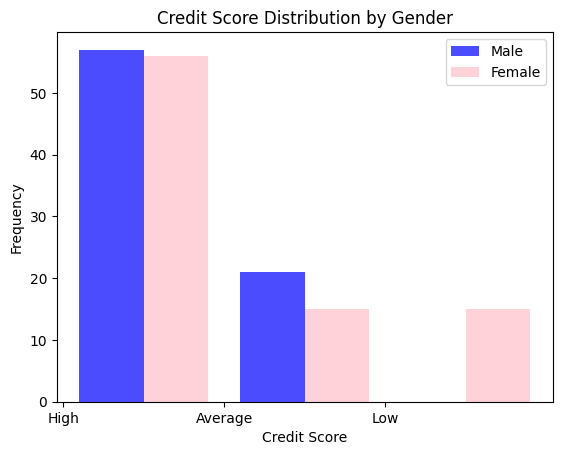

In [ ]:
# Compare 'Gender' With 'Target Value' columns in dataset
# Separate data by gender
male_data = df[df['Gender'] == 'Male']['Credit Score']
female_data = df[df['Gender'] == 'Female']['Credit Score']
# Create histograms for each gender
plt.hist([male_data, female_data], bins=[0, 1, 2, 3], color=['blue', 'pink'], label=['Male', 'Female'], alpha=0.7)
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Credit Score Distribution by Gender')
plt.legend()
plt.show()

**Model Performance Metrics:**

Decision Tree Model

Logistic Regression Model

Present performance metrics (accuracy, precision, recall) to access the effectiveness of both machine learning models.

In [ ]:
# Split the data into features (X) and target variable (y)
X = df.drop('Credit Score', axis=1)
y = df['Credit Score']
# Convert categorical variables to numerical
X_new = pd.get_dummies(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)
# Predict the target variable for the test set
y_pred_DT = DT.predict(X_test)
# Evaluate the Decision Tree model
accuracy_DT = metrics.accuracy_score(y_test, y_pred_DT)
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_DT)
print("Classification Report:")
print(classification_report(y_test, y_pred_DT))

# Logistic Regression Classifier
LR = LogisticRegression(random_state=42, max_iter=1000)
LR.fit(X_train, y_train)
# Predict the target variable for the test set
y_pred_LR = LR.predict(X_test)
# Evaluate the Logistic Regression model
accuracy_LR = metrics.accuracy_score(y_test, y_pred_LR)
print("\nLogistic Regression Classifier:")
print("Accuracy:", accuracy_LR)
print("Classification Report:")
print(classification_report(y_test, y_pred_LR))

Decision Tree Classifier:
Accuracy: 0.9696969696969697
Classification Report:
              precision    recall  f1-score   support

     Average       0.83      1.00      0.91         5
        High       1.00      0.96      0.98        23
         Low       1.00      1.00      1.00         5

    accuracy                           0.97        33
   macro avg       0.94      0.99      0.96        33
weighted avg       0.97      0.97      0.97        33


Logistic Regression Classifier:
Accuracy: 0.9696969696969697
Classification Report:
              precision    recall  f1-score   support

     Average       1.00      0.80      0.89         5
        High       0.96      1.00      0.98        23
         Low       1.00      1.00      1.00         5

    accuracy                           0.97        33
   macro avg       0.99      0.93      0.96        33
weighted avg       0.97      0.97      0.97        33



**Result:**

In [ ]:
# Create DataFrames for Decision Tree and Logistic Regression results
dt_results = pd.DataFrame({
    'Model': ['Decision Tree'],
    'Accuracy': [accuracy_DT]
})
lr_results = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Accuracy': [accuracy_LR]
})

# Concatenate the DataFrames for comparison
comparison_df = pd.concat([dt_results, lr_results], ignore_index=True)

# Display the comparison DataFrame
print("Comparison of Decision Tree and Logistic Regression Models:")
print(comparison_df)

Comparison of Decision Tree and Logistic Regression Models:
                 Model  Accuracy
0        Decision Tree  0.969697
1  Logistic Regression  0.969697


**Conclusion:**

Based on the comparison of the Decision Tree and Logistic Regression models, both achieved a high accuracy of approximately 97%, indicating strong predictive performance. In the absence of additional performance metrics and considering that the accuracy is the same for both models, the decision to choose between them may be influenced by other factors such as interpretability, computational efficiency, and the specific requirements of the credit score classification task.